In [209]:
# Importation des différents packages requis pour les différentes tâches

# Importation du fichier 'GLMRegression' et ses méthodes
from GLMRegression import GLMsummary
from GLMRegression import smfGLM

# Importation de 'pandas' (lecture de fichier et gestion de dataframe)
import pandas as pd

# Importation de 'seaborn' pour les représentations
import seaborn as sns

# Importation de 'pyplot' pour afficher les graphiques
import matplotlib.pyplot as plt

# Importation de 'accuracy_score' & 'mean_squared_error', 'confusion_matrix' pour la régression logistique depuis sklearn
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

# Importation de 'train_test_split', 'cross_val_score' pour la régression logistique depuis sklearn
from sklearn.model_selection import train_test_split, cross_val_score

# Importation de 'LogisticRegression' pour la cross-validation score (modèle compatible)
from sklearn.linear_model import LogisticRegression

# Importation de 'statsmodels.api' pour récupérer un modèle de GLM
import statsmodels.api as sm

# Importation de 'statsmodels.formula.api' pour récupérer un modèle de GLM de Poisson
import statsmodels.formula.api as smf

# Importation de 'KMeans' et 'numpy' pour le clustering
from sklearn.cluster import KMeans
import numpy as np

## 1 - Données

In [111]:
# On définit la SEED qui sera à utiliser (Data2.csv -> SEED = 2)
SEED = 2

# On définit ensuite l'aléatoire, grâce à la ligne suivante
np.random.seed(SEED)

In [113]:
# On lit le fichier .csv
df = pd.read_csv("Data2.csv")
df = df.drop('Unnamed: 0', axis=1)

# Récupère le nombre d'observations (lignes) et le nombre de variables (colonnes)
print(f"Nous dénombrons au total {df.shape[0]} observations, et on compte {df.shape[1]} variables.")

# Affichage des 5 premières valeurs pour visualiser les données
df.head()

Nous dénombrons au total 2000 observations, et on compte 8 variables.


,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain
0,Printemps,34.976541,396.592403,Moyenne,12.922438,2,1.629064,1
1,Hiver,9.297704,87.792413,Dense,2.872035,2,1.902443,1
2,Été,59.140881,446.247961,Rare,1.832342,0,0.000000,0
3,Printemps,76.867984,99.219351,Faible,12.254776,0,0.000000,0
4,Automne,130.059814,680.123481,Dense,9.196711,0,0.000000,0


In [114]:
# On récolte les informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   saison          2000 non-null   object 
 1   distancemer     2000 non-null   float64
 2   altitude        2000 non-null   float64
 3   vegetation      2000 non-null   object 
 4   densite         2000 non-null   float64
 5   nb_averses      2000 non-null   int64  
 6   volume          2000 non-null   float64
 7   pluieLendemain  2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


Examiner quelles sont les corrélations entre les différentes variables

<Axes: >

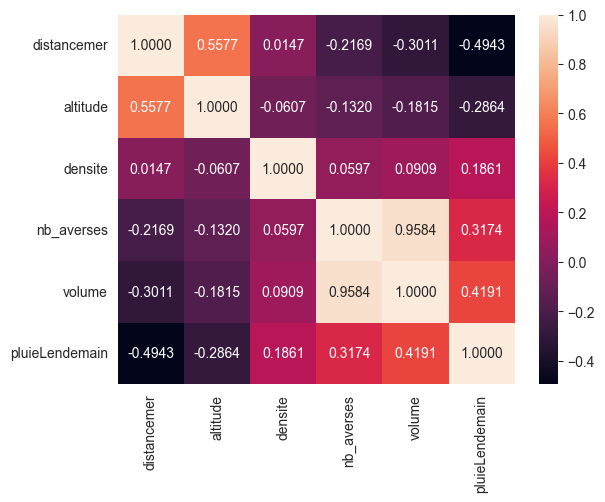

In [115]:
# Définit la matrice de corrélation selon les différentes variables numériques. En effet, il est difficile d'exprimer la corrélation de la colonne 
# 'v2' (corréler la valeur 'A' avec '-5.24' n'est pas évident !)...
correlation_matrix = df.corr(numeric_only = True)

# Affiche une heatmap carrée où chaque case exprime la corrélation des variables entre l'abscisse et l'ordonnée
sns.heatmap(df.corr(numeric_only = True), annot=True, fmt='.4f')

In [116]:
# On split le jeu de données sous forme de 70% (train set) - 30% (test set), random_state = 2 : permet d'avoir des résultats reproductibles. Afin 
# de s'assurer que les résultats soient cohérents durant l'évaluation et durant votre correction, un facteur de reproductibilité est préférable...
train_set, test_set = train_test_split(df, test_size=0.30, random_state=SEED)

In [117]:
# On visualise les données du train set
train_set.head()

,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain
407,Hiver,8.502806,29.351237,Dense,4.850199,0,0.000000,1
315,Printemps,2.890457,15.578074,Rare,3.329904,1,1.230269,1
1390,Été,46.573110,292.860525,Dense,0.060703,0,0.000000,0
1991,Printemps,8.409466,161.916371,Faible,7.647170,1,1.077837,1
429,Été,16.405357,151.336632,Moyenne,0.460722,0,0.000000,0


In [118]:
# On visualise les données du test set
test_set.head()

,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain
278,Été,1.264994,7.057584,Dense,0.553854,2,1.896096,1
492,Hiver,8.980821,131.684127,Dense,16.104075,1,0.953510,1
1266,Hiver,6.272339,42.736972,Dense,4.310429,3,2.930554,1
557,Printemps,21.693536,96.327070,Dense,1.248958,2,1.724594,1
871,Hiver,11.753119,175.183948,Dense,13.862480,1,0.935687,1


In [119]:
print(f"Les dimensions du test sont : {test_set.shape}")

Les dimensions du test sont : (600, 8)


## 2 - Prédiction du nombre d'averses

Text(0, 0.5, 'Occurrences')

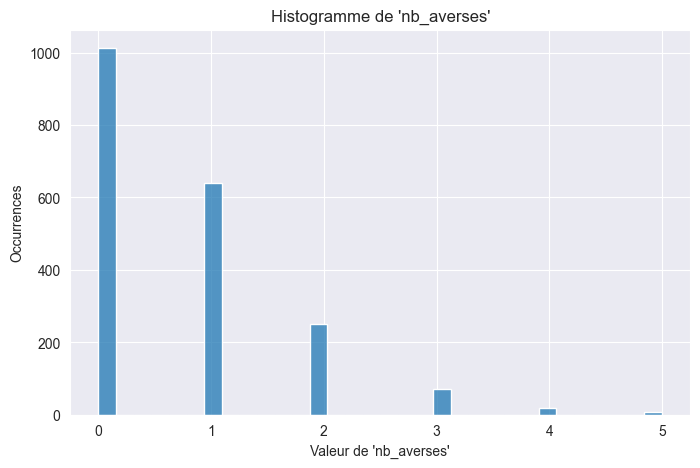

In [120]:
f, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data = df, x = 'nb_averses')
ax.set_title(f"Histogramme de 'nb_averses'")
ax.set_xlabel(f"Valeur de 'nb_averses'")
ax.set_ylabel('Occurrences')

Il semble que l'on tende vers une distribution de Poisson conformément à l'histogramme du nombre d'averses.

In [121]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_poisson_1 = smf.glm('nb_averses ~ saison + distancemer + altitude + vegetation + densite', family = sm.families.Poisson(), data = train_set).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_poisson_1)

Dep. Variable:,nb_averses,No. Observations:,1400
Model:,GLM,Df Residuals:,1390
Model Family:,Poisson,Df Model:,9
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1563.3
Date:,"Wed, 10 Jan 2024",Deviance:,1560.2
Time:,09:12:48,Pearson chi2:,1.50e+03
No. Iterations:,5,Pseudo R-squ. (CS):,0.06913
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,-0.1195,0.095,-1.252,0.210,-0.307,0.068,2.104044e-01,
saison[T.Hiver],-0.0682,0.091,-0.748,0.454,-0.247,0.110,4.543797e-01,
saison[T.Printemps],0.1770,0.087,2.036,0.042,0.007,0.347,4.178530e-02,*
saison[T.Été],0.0241,0.089,0.271,0.787,-0.150,0.198,7.867092e-01,
vegetation[T.Faible],0.0668,0.088,0.758,0.449,-0.106,0.239,4.485233e-01,
vegetation[T.Moyenne],0.0033,0.091,0.036,0.971,-0.175,0.182,9.709898e-01,
vegetation[T.Rare],0.0929,0.090,1.033,0.301,-0.083,0.269,3.014912e-01,
distancemer,-0.0116,0.002,-6.896,0.000,-0.015,-0.008,5.353660e-12,***
altitude,-1.462e-05,0.000,-0.116,0.908,-0.000,0.000,9.079894e-01,
densite,0.0027,0.002,1.330,0.184,-0.001,0.007,1.835078e-01,


In [122]:
print("L'erreur moyenne quadratique (MSE) est de :", round(mean_squared_error(test_set['nb_averses'], glm_poisson_1.predict(test_set)), 5))

L'erreur moyenne quadratique (MSE) est de : 0.79743


In [123]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_poisson_2 = smf.glm('nb_averses ~ saison + distancemer', family = sm.families.Poisson(), data = train_set).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_poisson_2)

Dep. Variable:,nb_averses,No. Observations:,1400
Model:,GLM,Df Residuals:,1395
Model Family:,Poisson,Df Model:,4
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1564.9
Date:,"Wed, 10 Jan 2024",Deviance:,1563.5
Time:,09:12:51,Pearson chi2:,1.51e+03
No. Iterations:,5,Pseudo R-squ. (CS):,0.06698
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,-0.0390,0.070,-0.559,0.576,-0.176,0.098,5.763259e-01,
saison[T.Hiver],-0.0664,0.091,-0.729,0.466,-0.245,0.112,4.656964e-01,
saison[T.Printemps],0.1762,0.087,2.029,0.043,0.006,0.346,4.250558e-02,*
saison[T.Été],0.0285,0.089,0.321,0.748,-0.145,0.202,7.480400e-01,
distancemer,-0.0120,0.001,-8.541,0.000,-0.015,-0.009,1.332472e-17,***


In [124]:
print("L'erreur moyenne quadratique (MSE) est de :", round(mean_squared_error(test_set['nb_averses'], glm_poisson_2.predict(test_set)), 5))

L'erreur moyenne quadratique (MSE) est de : 0.79437


In [125]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_poisson_3 = smf.glm('nb_averses ~ saison + distancemer + I(distancemer**2)', family = sm.families.Poisson(), data = train_set).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_poisson_3)

Dep. Variable:,nb_averses,No. Observations:,1400
Model:,GLM,Df Residuals:,1394
Model Family:,Poisson,Df Model:,5
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1554.6
Date:,"Wed, 10 Jan 2024",Deviance:,1542.9
Time:,09:14:23,Pearson chi2:,1.47e+03
No. Iterations:,5,Pseudo R-squ. (CS):,0.08056
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.0782,0.073,1.068,0.285,-0.065,0.222,2.853093e-01,
saison[T.Hiver],-0.0491,0.091,-0.539,0.590,-0.228,0.130,5.899420e-01,
saison[T.Printemps],0.1802,0.087,2.074,0.038,0.010,0.351,3.807160e-02,*
saison[T.Été],0.0366,0.089,0.412,0.680,-0.137,0.211,6.800321e-01,
distancemer,-0.0226,0.003,-8.617,0.000,-0.028,-0.017,6.890626e-18,***
I(distancemer ** 2),0.0001,2.02e-05,5.249,0.000,6.64e-05,0.000,1.531874e-07,***


In [126]:
print("L'erreur moyenne quadratique (MSE) est de :", round(mean_squared_error(test_set['nb_averses'], glm_poisson_3.predict(test_set)), 5))

L'erreur moyenne quadratique (MSE) est de : 0.7941


In [128]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_poisson_4 = smf.glm('nb_averses ~ saison + distancemer + I(distancemer**2) + I(distancemer**3)', family = sm.families.Poisson(), data = train_set).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_poisson_4)

Dep. Variable:,nb_averses,No. Observations:,1400
Model:,GLM,Df Residuals:,1393
Model Family:,Poisson,Df Model:,6
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1553.1
Date:,"Wed, 10 Jan 2024",Deviance:,1539.9
Time:,09:20:22,Pearson chi2:,1.46e+03
No. Iterations:,5,Pseudo R-squ. (CS):,0.08253
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.1317,0.079,1.666,0.096,-0.023,0.287,9.574921e-02,.
saison[T.Hiver],-0.0458,0.091,-0.503,0.615,-0.224,0.133,6.151206e-01,
saison[T.Printemps],0.1845,0.087,2.122,0.034,0.014,0.355,3.379804e-02,*
saison[T.Été],0.0367,0.089,0.413,0.679,-0.137,0.211,6.792455e-01,
distancemer,-0.0300,0.005,-5.939,0.000,-0.040,-0.020,2.868061e-09,***
I(distancemer ** 2),0.0003,9.19e-05,2.814,0.005,7.85e-05,0.000,4.895162e-03,**
I(distancemer ** 3),-6.697e-07,4.05e-07,-1.654,0.098,-1.46e-06,1.24e-07,9.806139e-02,.


In [129]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_poisson_5 = smf.glm('nb_averses ~ saison + distancemer + I(distancemer**2) + I(distancemer**3) + I(distancemer**4)', family = sm.families.Poisson(), data = train_set).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_poisson_5)

Dep. Variable:,nb_averses,No. Observations:,1400
Model:,GLM,Df Residuals:,1392
Model Family:,Poisson,Df Model:,7
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1553.1
Date:,"Wed, 10 Jan 2024",Deviance:,1539.9
Time:,09:20:57,Pearson chi2:,1.46e+03
No. Iterations:,5,Pseudo R-squ. (CS):,0.08253
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.1339,0.084,1.589,0.112,-0.031,0.299,0.112105,
saison[T.Hiver],-0.0454,0.091,-0.498,0.619,-0.224,0.133,0.618742,
saison[T.Printemps],0.1849,0.087,2.123,0.034,0.014,0.356,0.033733,*
saison[T.Été],0.0371,0.089,0.417,0.677,-0.137,0.211,0.676789,
distancemer,-0.0305,0.008,-3.686,0.000,-0.047,-0.014,0.000227,***
I(distancemer ** 2),0.0003,0.000,1.104,0.269,-0.000,0.001,0.269396,
I(distancemer ** 3),-8.512e-07,2.46e-06,-0.346,0.729,-5.67e-06,3.97e-06,0.729411,
I(distancemer ** 4),5.493e-10,7.34e-09,0.075,0.940,-1.38e-08,1.49e-08,0.940327,


In [130]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_poisson_6 = smf.glm('nb_averses ~ saison + distancemer + I(distancemer**2) + I(distancemer**3) + I(distancemer**4) + I(distancemer**5)', family = sm.families.Poisson(), data = train_set).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_poisson_6)

Dep. Variable:,nb_averses,No. Observations:,1400
Model:,GLM,Df Residuals:,1391
Model Family:,Poisson,Df Model:,8
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1551.6
Date:,"Wed, 10 Jan 2024",Deviance:,1537.0
Time:,09:21:19,Pearson chi2:,1.46e+03
No. Iterations:,5,Pseudo R-squ. (CS):,0.08447
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.1940,0.091,2.136,0.033,0.016,0.372,0.032673,*
saison[T.Hiver],-0.0427,0.091,-0.468,0.640,-0.222,0.136,0.639923,
saison[T.Printemps],0.1871,0.087,2.147,0.032,0.016,0.358,0.031802,*
saison[T.Été],0.0421,0.089,0.473,0.636,-0.132,0.216,0.636206,
distancemer,-0.0479,0.013,-3.605,0.000,-0.074,-0.022,0.000312,***
I(distancemer ** 2),0.0012,0.001,1.956,0.050,-2.16e-06,0.002,0.050415,.
I(distancemer ** 3),-1.73e-05,1.04e-05,-1.657,0.098,-3.78e-05,3.17e-06,0.097607,.
I(distancemer ** 4),1.145e-07,7.22e-08,1.585,0.113,-2.71e-08,2.56e-07,0.112986,
I(distancemer ** 5),-2.651e-10,1.72e-10,-1.543,0.123,-6.02e-10,7.17e-11,0.122897,


## 3 - Validation croisée

In [145]:
# On utilisera sklearn pour pouvoir utiliser la fonction cross_val_score() de sklearn
glm_poisson_7 = smfGLM(formula='nb_averses ~ saison + distancemer + I(distancemer**2) + I(distancemer**3)', family=sm.families.Poisson())

# Préparation des matrices X et y
X = df.drop('nb_averses', axis=1)
y = df['nb_averses']

# On calcule ensuite le score de la validation croisée (le score correspond à la moyenne de chaque score de cv) [On prendra cv = 10]
mean_score_cv = cross_val_score(glm_poisson_7, X, y, cv=10, scoring='neg_mean_squared_error')
print('La corss-validation est de :', mean_score_cv)
print('Le cross-validation score moyen est de :', mean_score_cv.mean())

La corss-validation est de : [-0.83884548 -0.77309666 -0.77651313 -0.72348676 -0.69695609 -0.77513916
 -0.8027447  -0.84614548 -0.75606191 -0.79184911]
Le cross-validation score moyen est de : -0.7780838487528465


## 4 - Prédiction du volume

In [191]:
# On récupère le tableau de pluie 
Data_Pluie = df[df['nb_averses'] > 0].copy()

Data_Pluie['volume_par_averse'] = Data_Pluie['volume'] / Data_Pluie['nb_averses']

# On regarde le nombre d'observations
print(f"Il y a {Data_Pluie.shape[0]} observations.")

Data_Pluie.head()

Il y a 987 observations.


,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain,volume_par_averse
0,Printemps,34.976541,396.592403,Moyenne,12.922438,2,1.629064,1,0.814532
1,Hiver,9.297704,87.792413,Dense,2.872035,2,1.902443,1,0.951222
6,Automne,8.141122,41.660574,Dense,51.414469,1,0.899965,0,0.899965
8,Printemps,7.358844,72.197727,Faible,4.031347,1,1.086563,1,1.086563
13,Hiver,49.855514,204.717666,Faible,0.016507,1,0.659087,0,0.659087


Text(0, 0.5, 'Occurrences')

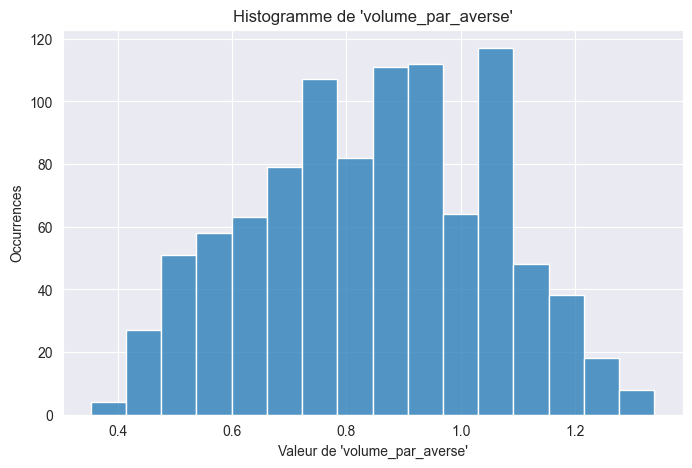

In [192]:
# On visualise la distribution pour choisir la famille à posteriori
f, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data = Data_Pluie, x = 'volume_par_averse')
ax.set_title(f"Histogramme de 'volume_par_averse'")
ax.set_xlabel(f"Valeur de 'volume_par_averse'")
ax.set_ylabel('Occurrences')

In [193]:
# Nous construisons un 'GLM' selon une distribution de Gaussienne
glm_gaussian_1 = smf.glm('volume_par_averse ~ saison + distancemer + altitude + vegetation + densite', family = sm.families.Gaussian(), data = Data_Pluie).fit()

# On affiche les informations générales pour le model de Gausse
GLMsummary(glm_gaussian_1)

Dep. Variable:,volume_par_averse,No. Observations:,987
Model:,GLM,Df Residuals:,977
Model Family:,Gaussian,Df Model:,9
Link Function:,Identity,Scale:,0.010027
Method:,IRLS,Log-Likelihood:,875.87
Date:,"Wed, 10 Jan 2024",Deviance:,9.7962
Time:,10:40:33,Pearson chi2:,9.80
No. Iterations:,3,Pseudo R-squ. (CS):,0.9613
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.9363,0.010,98.478,0.000,0.918,0.955,0.000000e+00,***
saison[T.Hiver],0.0343,0.009,3.700,0.000,0.016,0.052,2.154762e-04,***
saison[T.Printemps],0.1624,0.009,18.128,0.000,0.145,0.180,1.929354e-73,***
saison[T.Été],-0.1301,0.009,-14.370,0.000,-0.148,-0.112,7.941931e-47,***
vegetation[T.Faible],0.0042,0.009,0.466,0.641,-0.013,0.022,6.408774e-01,
vegetation[T.Moyenne],-0.0019,0.009,-0.213,0.831,-0.020,0.016,8.310874e-01,
vegetation[T.Rare],-0.0107,0.009,-1.156,0.248,-0.029,0.007,2.478414e-01,
distancemer,-0.0054,0.000,-35.130,0.000,-0.006,-0.005,2.314512e-270,***
altitude,-2.463e-05,1.2e-05,-2.055,0.040,-4.81e-05,-1.14e-06,3.988070e-02,*
densite,0.0021,0.000,10.248,0.000,0.002,0.003,1.211659e-24,***


In [194]:
# Nous construisons un 'GLM' selon une distribution de Gaussienne
glm_gaussian_2 = smf.glm('volume_par_averse ~ saison + distancemer', family = sm.families.Gaussian(), data = Data_Pluie).fit()

# On affiche les informations générales pour le model de Gausse
GLMsummary(glm_gaussian_2)

Dep. Variable:,volume_par_averse,No. Observations:,987
Model:,GLM,Df Residuals:,982
Model Family:,Gaussian,Df Model:,4
Link Function:,Identity,Scale:,0.011138
Method:,IRLS,Log-Likelihood:,821.50
Date:,"Wed, 10 Jan 2024",Deviance:,10.937
Time:,10:40:34,Pearson chi2:,10.9
No. Iterations:,3,Pseudo R-squ. (CS):,0.9407
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.9621,0.007,129.647,0.000,0.948,0.977,0.000000e+00,***
saison[T.Hiver],0.0385,0.010,3.956,0.000,0.019,0.058,7.621767e-05,***
saison[T.Printemps],0.1644,0.009,17.487,0.000,0.146,0.183,1.798842e-68,***
saison[T.Été],-0.1269,0.010,-13.332,0.000,-0.146,-0.108,1.506158e-40,***
distancemer,-0.0056,0.000,-43.290,0.000,-0.006,-0.005,0.000000e+00,***


In [195]:
# On utilisera sklearn pour pouvoir utiliser la fonction cross_val_score() de sklearn
glm_gaussien_3 = smfGLM(formula='volume_par_averse ~ saison + distancemer', family=sm.families.Gaussian())

# Préparation des matrices X_pluie et y_pluie
X_pluie = Data_Pluie.drop('volume_par_averse', axis=1)
y_pluie = Data_Pluie['volume_par_averse']

# On calcule ensuite le score de la validation croisée (le score correspond à la moyenne de chaque score de cv) [On prendra cv = 5]
mean_score_cv = cross_val_score(glm_gaussien_3, X_pluie, y_pluie, cv=5, scoring='neg_mean_squared_error')
print('La corss-validation est de :', mean_score_cv)
print('Le cross-validation score moyen est de :', mean_score_cv.mean())

La corss-validation est de : [-0.01026334 -0.0111311  -0.01569618 -0.01085791 -0.00914641]
Le cross-validation score moyen est de : -0.011418990528457578


On soupçonne qu'il puisse y avoir une dépendance en le log de la distance à la mer.

In [196]:
# On ajoute le log
X_pluie['log_distancemer'] = np.log(Data_Pluie['distancemer'])

# On affiche X_pluie
X_pluie.head()

,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain,log_distancemer
0,Printemps,34.976541,396.592403,Moyenne,12.922438,2,1.629064,1,3.554678
1,Hiver,9.297704,87.792413,Dense,2.872035,2,1.902443,1,2.229767
6,Automne,8.141122,41.660574,Dense,51.414469,1,0.899965,0,2.096928
8,Printemps,7.358844,72.197727,Faible,4.031347,1,1.086563,1,1.995903
13,Hiver,49.855514,204.717666,Faible,0.016507,1,0.659087,0,3.909129


In [197]:
# Nous construisons un 'GLM' selon une distribution de Gaussienne
glm_gaussian_4 = smf.glm('volume_par_averse ~ saison + distancemer + np.log(distancemer)', family = sm.families.Gaussian(), data = Data_Pluie).fit()

# On affiche les informations générales pour le model de Gausse
GLMsummary(glm_gaussian_4)

Dep. Variable:,volume_par_averse,No. Observations:,987
Model:,GLM,Df Residuals:,981
Model Family:,Gaussian,Df Model:,5
Link Function:,Identity,Scale:,0.0050150
Method:,IRLS,Log-Likelihood:,1215.8
Date:,"Wed, 10 Jan 2024",Deviance:,4.9197
Time:,10:41:47,Pearson chi2:,4.92
No. Iterations:,3,Pseudo R-squ. (CS):,0.9994
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,1.1036,0.006,171.332,0.000,1.091,1.116,0.000000e+00,***
saison[T.Hiver],0.0531,0.007,8.111,0.000,0.040,0.066,5.014910e-16,***
saison[T.Printemps],0.1780,0.006,28.155,0.000,0.166,0.190,2.093730e-174,***
saison[T.Été],-0.1192,0.006,-18.658,0.000,-0.132,-0.107,1.079373e-77,***
distancemer,-0.0020,0.000,-14.811,0.000,-0.002,-0.002,1.234922e-49,***
np.log(distancemer),-0.0928,0.003,-34.639,0.000,-0.098,-0.088,6.454526e-263,***


In [199]:
# On utilisera sklearn pour pouvoir utiliser la fonction cross_val_score() de sklearn
glm_gaussien_5 = smfGLM(formula='volume_par_averse ~ saison + distancemer + log_distancemer', family=sm.families.Gaussian())

# On calcule ensuite le score de la validation croisée (le score correspond à la moyenne de chaque score de cv) [On prendra cv = 5]
mean_score_cv = cross_val_score(glm_gaussien_5, X_pluie, y_pluie, cv=5, scoring='neg_mean_squared_error')
print('La corss-validation est de :', mean_score_cv)
print('Le cross-validation score moyen est de :', mean_score_cv.mean())

La corss-validation est de : [-0.00408722 -0.00562079 -0.00588261 -0.00496041 -0.00486773]
Le cross-validation score moyen est de : -0.005083751839808112


## 5 - Prédiction de la pluie le lendemain 

Text(0, 0.5, 'Occurrences')

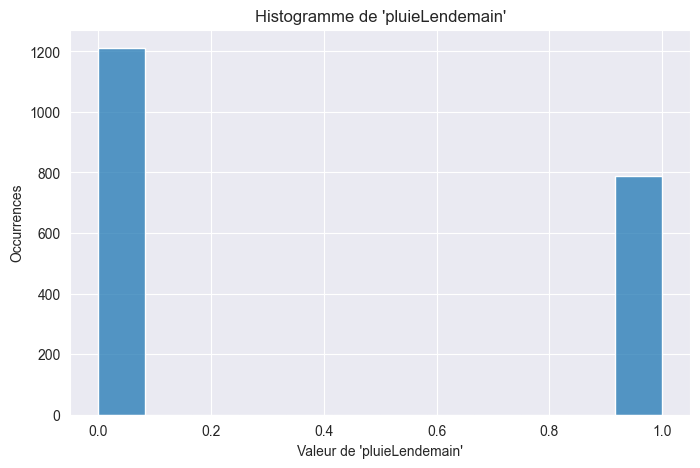

In [200]:
f, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data = df, x = 'pluieLendemain')
ax.set_title(f"Histogramme de 'pluieLendemain'")
ax.set_xlabel(f"Valeur de 'pluieLendemain'")
ax.set_ylabel('Occurrences')

On observe une distribution binomial.

In [201]:
# On split le jeu de données sous forme de 75% (train set) - 25% (test set), random_state = 2 : permet d'avoir des résultats reproductibles. Afin 
# de s'assurer que les résultats soient cohérents durant l'évaluation et durant votre correction, un facteur de reproductibilité est préférable...
train_set_lendemain, test_set_lendemain = train_test_split(df, test_size=0.25, random_state=SEED)

# On observe le train set
train_set_lendemain.head()

,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain
1346,Automne,33.742940,156.678476,Faible,6.459378,0,0.000000,0
795,Automne,56.368599,902.176539,Dense,0.210902,0,0.000000,0
745,Été,14.121846,180.622954,Faible,13.536040,2,1.486943,1
71,Automne,70.950510,195.476760,Moyenne,17.803323,0,0.000000,0
1495,Hiver,59.755064,267.811590,Rare,1.220745,0,0.000000,0


In [215]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_binom_1 = smf.glm('pluieLendemain ~ saison + distancemer + altitude + nb_averses', family = sm.families.Binomial(), data = train_set_lendemain).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_binom_1)

Dep. Variable:,pluieLendemain,No. Observations:,1500
Model:,GLM,Df Residuals:,1493
Model Family:,Binomial,Df Model:,6
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-550.71
Date:,"Wed, 10 Jan 2024",Deviance:,1101.4
Time:,10:56:25,Pearson chi2:,1.77e+07
No. Iterations:,7,Pseudo R-squ. (CS):,0.4516
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.4093,0.181,2.266,0.023,0.055,0.763,2.346158e-02,*
saison[T.Hiver],1.7261,0.219,7.873,0.000,1.296,2.156,3.458329e-15,***
saison[T.Printemps],2.5278,0.241,10.467,0.000,2.054,3.001,1.220262e-25,***
saison[T.Été],0.0593,0.210,0.283,0.777,-0.352,0.470,7.774092e-01,
distancemer,-0.1099,0.008,-14.034,0.000,-0.125,-0.095,9.608905e-45,***
altitude,-0.0011,0.001,-2.004,0.045,-0.002,-2.49e-05,4.509047e-02,*
nb_averses,0.6626,0.092,7.199,0.000,0.482,0.843,6.056112e-13,***


In [216]:
# Make predictions on the test set
predicted_probabilities = glm_binom_1.predict(test_set_lendemain)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
threshold = 0.5  # You can adjust the threshold based on your needs
predicted_labels = (predicted_probabilities > threshold).astype(int)

# Extract the actual labels from the test set
actual_labels = test_set_lendemain['pluieLendemain']

# Calculate accuracy
accuracy = (predicted_labels == actual_labels).mean()

# Calculate sensitivity (true positive rate or recall)
true_positives = ((predicted_labels == 1) & (actual_labels == 1)).sum()
false_negatives = ((predicted_labels == 0) & (actual_labels == 1)).sum()
sensitivity = true_positives / (true_positives + false_negatives)

# Print the accuracy and sensitivity
print(f'Accuracy on the test set: {accuracy:.2%}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2%}')

Accuracy on the test set: 85.60%
Sensitivity (True Positive Rate): 82.21%


In [217]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_binom_2 = smf.glm('pluieLendemain ~ saison + distancemer + altitude + nb_averses + I(distancemer**2)', family = sm.families.Binomial(), data = train_set_lendemain).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_binom_2)

Dep. Variable:,pluieLendemain,No. Observations:,1500
Model:,GLM,Df Residuals:,1492
Model Family:,Binomial,Df Model:,7
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-492.65
Date:,"Wed, 10 Jan 2024",Deviance:,985.29
Time:,10:57:20,Pearson chi2:,8.27e+03
No. Iterations:,7,Pseudo R-squ. (CS):,0.4925
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.8735,0.195,4.477,0.000,0.491,1.256,7.564626e-06,***
saison[T.Hiver],2.1161,0.243,8.717,0.000,1.640,2.592,2.851783e-18,***
saison[T.Printemps],2.9827,0.269,11.105,0.000,2.456,3.509,1.186027e-28,***
saison[T.Été],0.1774,0.225,0.788,0.431,-0.264,0.619,4.307458e-01,
distancemer,-0.1809,0.011,-16.609,0.000,-0.202,-0.160,5.967449e-62,***
altitude,-0.0005,0.000,-1.265,0.206,-0.001,0.000,2.059794e-01,
nb_averses,0.7148,0.100,7.175,0.000,0.520,0.910,7.219913e-13,***
I(distancemer ** 2),0.0009,6.56e-05,13.344,0.000,0.001,0.001,1.290619e-40,***


In [218]:
# Make predictions on the training set
predicted_probabilities_train = glm_binom_2.predict(train_set_lendemain)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
threshold = 0.5  # You can adjust the threshold based on your needs
predicted_labels_train = (predicted_probabilities_train > threshold).astype(int)

# Extract the actual labels from the training set
actual_labels_train = train_set_lendemain['pluieLendemain']

# Calculate confusion matrix on the training set
confusion_matrix_train = confusion_matrix(actual_labels_train, predicted_labels_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(actual_labels_train, predicted_labels_train)

# Make predictions on the test set
predicted_probabilities_test = glm_binom_2.predict(test_set_lendemain)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
predicted_labels_test = (predicted_probabilities_test > threshold).astype(int)

# Extract the actual labels from the test set
actual_labels_test = test_set_lendemain['pluieLendemain']

# Calculate confusion matrix on the test set
confusion_matrix_test = confusion_matrix(actual_labels_test, predicted_labels_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)

# Print confusion matrices and accuracy
print("Confusion Matrix on Train Set:")
print(confusion_matrix_train)
print(f'Accuracy on Train Set: {accuracy_train:.2%}')

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix_test)
print(f'Accuracy on Test Set: {accuracy_test:.2%}')

Confusion Matrix on Train Set:
[[828  91]
 [ 98 483]]
Accuracy on Train Set: 87.40%

Confusion Matrix on Test Set:
[[260  32]
 [ 35 173]]
Accuracy on Test Set: 86.60%


In [219]:
# Calcul de la matrice de confusion sur l'ensemble de test
true_positives_test = confusion_matrix_test[1, 1]  # Vrais Positifs
false_negatives_test = confusion_matrix_test[1, 0]  # Faux Négatifs

# Calcul de la sensibilité sur l'ensemble de test
sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

# Afficher la sensibilité sur l'ensemble de test
print(f'Sensibilité (True Positive Rate) sur l\'ensemble de test : {sensitivity_test:.2%}')

Sensibilité (True Positive Rate) sur l'ensemble de test : 83.17%


In [220]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_binom_3 = smf.glm('pluieLendemain ~ saison + distancemer + altitude + nb_averses + np.log(distancemer)', family = sm.families.Binomial(), data = train_set_lendemain).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_binom_3)

Dep. Variable:,pluieLendemain,No. Observations:,1500
Model:,GLM,Df Residuals:,1492
Model Family:,Binomial,Df Model:,7
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-501.06
Date:,"Wed, 10 Jan 2024",Deviance:,1002.1
Time:,10:58:30,Pearson chi2:,4.96e+03
No. Iterations:,7,Pseudo R-squ. (CS):,0.4868
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,3.2180,0.427,7.536,0.000,2.381,4.055,4.856540e-14,***
saison[T.Hiver],2.2014,0.252,8.728,0.000,1.707,2.696,2.585804e-18,***
saison[T.Printemps],2.9360,0.264,11.103,0.000,2.418,3.454,1.208354e-28,***
saison[T.Été],0.2734,0.251,1.088,0.276,-0.219,0.766,2.764735e-01,
distancemer,-0.0039,0.011,-0.365,0.715,-0.025,0.017,7.147529e-01,
altitude,-0.0009,0.000,-1.730,0.084,-0.002,0.000,8.355877e-02,.
nb_averses,0.7223,0.099,7.314,0.000,0.529,0.916,2.599321e-13,***
np.log(distancemer),-1.9619,0.225,-8.720,0.000,-2.403,-1.521,2.774341e-18,***


In [221]:
# Make predictions on the training set
predicted_probabilities_train = glm_binom_3.predict(train_set_lendemain)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
threshold = 0.5  # You can adjust the threshold based on your needs
predicted_labels_train = (predicted_probabilities_train > threshold).astype(int)

# Extract the actual labels from the training set
actual_labels_train = train_set_lendemain['pluieLendemain']

# Calculate confusion matrix on the training set
confusion_matrix_train = confusion_matrix(actual_labels_train, predicted_labels_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(actual_labels_train, predicted_labels_train)

# Make predictions on the test set
predicted_probabilities_test = glm_binom_3.predict(test_set_lendemain)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
predicted_labels_test = (predicted_probabilities_test > threshold).astype(int)

# Extract the actual labels from the test set
actual_labels_test = test_set_lendemain['pluieLendemain']

# Calculate confusion matrix on the test set
confusion_matrix_test = confusion_matrix(actual_labels_test, predicted_labels_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)

# Print confusion matrices and accuracy
print("Confusion Matrix on Train Set:")
print(confusion_matrix_train)
print(f'Accuracy on Train Set: {accuracy_train:.2%}')

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix_test)
print(f'Accuracy on Test Set: {accuracy_test:.2%}')

Confusion Matrix on Train Set:
[[835  84]
 [123 458]]
Accuracy on Train Set: 86.20%

Confusion Matrix on Test Set:
[[267  25]
 [ 40 168]]
Accuracy on Test Set: 87.00%


In [222]:
# Calcul de la matrice de confusion sur l'ensemble de test
true_positives_test = confusion_matrix_test[1, 1]  # Vrais Positifs
false_negatives_test = confusion_matrix_test[1, 0]  # Faux Négatifs

# Calcul de la sensibilité sur l'ensemble de test
sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

# Afficher la sensibilité sur l'ensemble de test
print(f'Sensibilité (True Positive Rate) sur l\'ensemble de test : {sensitivity_test:.2%}')

Sensibilité (True Positive Rate) sur l'ensemble de test : 80.77%


## 6 - Une variable supplémentaire 

In [227]:
# Définir les conditions pour chaque classe
conditions = [
    (df['distancemer'] < 20) & (df['altitude'] < 20),
    (df['distancemer'] < 20) & (df['altitude'] > 20),
    (df['distancemer'] > 20)
]

# Définir les valeurs correspondantes pour chaque classe
values = ['1', '2', '3']

# Appliquer les conditions pour créer la variable "classe"
df['classe'] = np.select(conditions, values, default='Autre')

# Afficher les premières lignes du DataFrame avec la nouvelle variable
df.head()

,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain,classe
0,Printemps,34.976541,396.592403,Moyenne,12.922438,2,1.629064,1,3
1,Hiver,9.297704,87.792413,Dense,2.872035,2,1.902443,1,2
2,Été,59.140881,446.247961,Rare,1.832342,0,0.000000,0,3
3,Printemps,76.867984,99.219351,Faible,12.254776,0,0.000000,0,3
4,Automne,130.059814,680.123481,Dense,9.196711,0,0.000000,0,3


In [229]:
# On change en catégoriel
df['classe'] = df['classe'].astype('category')

# On observe les types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   saison          2000 non-null   object  
 1   distancemer     2000 non-null   float64 
 2   altitude        2000 non-null   float64 
 3   vegetation      2000 non-null   object  
 4   densite         2000 non-null   float64 
 5   nb_averses      2000 non-null   int64   
 6   volume          2000 non-null   float64 
 7   pluieLendemain  2000 non-null   int64   
 8   classe          2000 non-null   category
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 127.2+ KB


In [231]:
# Utilisez value_counts() pour compter les occurrences de chaque classe
counts = df['classe'].value_counts()

# Accédez au nombre de lignes pour "classe 3"
nombre_lignes_classe_3 = counts.get("3", 0)

# Affichez le nombre de lignes pour "classe 3"
print(f"Le nombre de lignes pour 'classe 3' est : {nombre_lignes_classe_3}")

Le nombre de lignes pour 'classe 3' est : 1025


In [234]:
# On split le jeu de données sous forme de 75% (train set) - 25% (test set), random_state = 2 : permet d'avoir des résultats reproductibles. Afin 
# de s'assurer que les résultats soient cohérents durant l'évaluation et durant votre correction, un facteur de reproductibilité est préférable...
train_set_class, test_set_class = train_test_split(df, test_size=0.25, random_state=SEED)

# On observe le train set
train_set_class.head()

,saison,distancemer,altitude,vegetation,densite,nb_averses,volume,pluieLendemain,classe
1346,Automne,33.742940,156.678476,Faible,6.459378,0,0.000000,0,3
795,Automne,56.368599,902.176539,Dense,0.210902,0,0.000000,0,3
745,Été,14.121846,180.622954,Faible,13.536040,2,1.486943,1,2
71,Automne,70.950510,195.476760,Moyenne,17.803323,0,0.000000,0,3
1495,Hiver,59.755064,267.811590,Rare,1.220745,0,0.000000,0,3


In [235]:
# Nous construisons un 'GLM' selon une distribution de Poisson
glm_binom_4 = smf.glm('pluieLendemain ~ saison + distancemer + np.log(distancemer) + classe', family = sm.families.Binomial(), data = df).fit()

# On affiche les informations générales pour le model de Poisson
GLMsummary(glm_binom_4)

Dep. Variable:,pluieLendemain,No. Observations:,2000
Model:,GLM,Df Residuals:,1992
Model Family:,Binomial,Df Model:,7
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-490.35
Date:,"Wed, 10 Jan 2024",Deviance:,980.70
Time:,11:16:44,Pearson chi2:,7.70e+03
No. Iterations:,7,Pseudo R-squ. (CS):,0.5730
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,3.0755,0.379,8.104,0.000,2.332,3.819,5.300855e-16,***
saison[T.Hiver],3.4113,0.301,11.327,0.000,2.821,4.002,9.693576e-30,***
saison[T.Printemps],4.8175,0.356,13.550,0.000,4.121,5.514,7.880784e-42,***
saison[T.Été],0.0919,0.235,0.391,0.696,-0.369,0.553,6.958909e-01,
classe[T.2],-3.3002,0.336,-9.831,0.000,-3.958,-2.642,8.298015e-23,***
classe[T.3],-8.0057,0.515,-15.554,0.000,-9.015,-6.997,1.499176e-54,***
distancemer,0.0057,0.005,1.053,0.292,-0.005,0.016,2.922299e-01,
np.log(distancemer),-0.3911,0.173,-2.262,0.024,-0.730,-0.052,2.369811e-02,*


In [236]:
# Make predictions on the training set
predicted_probabilities_train = glm_binom_4.predict(train_set_class)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
threshold = 0.5  # You can adjust the threshold based on your needs
predicted_labels_train = (predicted_probabilities_train > threshold).astype(int)

# Extract the actual labels from the training set
actual_labels_train = train_set_class['pluieLendemain']

# Calculate confusion matrix on the training set
confusion_matrix_train = confusion_matrix(actual_labels_train, predicted_labels_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(actual_labels_train, predicted_labels_train)

# Make predictions on the test set
predicted_probabilities_test = glm_binom_4.predict(test_set_class)

# Convert predicted probabilities to binary predictions (e.g., 0 or 1) based on a threshold
predicted_labels_test = (predicted_probabilities_test > threshold).astype(int)

# Extract the actual labels from the test set
actual_labels_test = test_set_class['pluieLendemain']

# Calculate confusion matrix on the test set
confusion_matrix_test = confusion_matrix(actual_labels_test, predicted_labels_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)

# Print confusion matrices and accuracy
print("Confusion Matrix on Train Set:")
print(confusion_matrix_train)
print(f'Accuracy on Train Set: {accuracy_train:.2%}')

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix_test)
print(f'Accuracy on Test Set: {accuracy_test:.2%}')

Confusion Matrix on Train Set:
[[905  14]
 [102 479]]
Accuracy on Train Set: 92.27%

Confusion Matrix on Test Set:
[[287   5]
 [ 41 167]]
Accuracy on Test Set: 90.80%


In [237]:
# Calcul de la matrice de confusion sur l'ensemble de test
true_positives_test = confusion_matrix_test[1, 1]  # Vrais Positifs
false_negatives_test = confusion_matrix_test[1, 0]  # Faux Négatifs

# Calcul de la sensibilité sur l'ensemble de test
sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

# Afficher la sensibilité sur l'ensemble de test
print(f'Sensibilité (True Positive Rate) sur l\'ensemble de test : {sensitivity_test:.2%}')

Sensibilité (True Positive Rate) sur l'ensemble de test : 80.29%


## 7 - Bootstrap

In [ ]:
from sklearn.linear_model import LinearRegression

train = df.iloc[:3000, :]
test = df.iloc[3000:4500, :]

X_train = train.drop(columns=["r"])
y_train = train["r"]
X_test = test.drop(columns=["r"])
y_test = test["r"]

model_b = LinearRegression()
model_b.fit(X_train, y_train)

y_pred_b = model_b.predict(X_test)
mse_squared_b = mean_squared_error(y_test, y_pred_b)
mse_squared_b

In [ ]:
I = np.random.choice(df.shape[0], size=df.shape[0], )  # Choix des index

In [ ]:
test = df.iloc[~I, :]
test

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot
from LinearRegression_in_Python_like_in_R import lm, summary, vif
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.cluster import KMeans

In [ ]:
def bootfn(data, index):
    train = data.iloc[index, :]
    test = data.iloc[~index, :]
    X_train = train.drop(columns=["r"])
    y_train = train["r"]
    X_test = test.drop(columns=["r"])
    y_test = test["r"]
    model_b = LinearRegression().fit(X_train, y_train)
    y_pred_test = model_b.predict(X_test)
    score=model.score(y_test, y_pred_test)
    confusion_bootstrap = confusion_matrix(y_test, y_pred_test)
    false_positive_rate_bootstrap = 1-(confusion_bootstrap[0][0] / confusion_bootstrap[0].sum())
    
    return score, false_positive_rate_bootstrap



B = 200

for b in range(B):
    I = np.random.choice(df.shape[0], size=df.shape[0], )  # Choix des index
    score_bootstrap, false_positive_rate_bootstrap = bootfn(df, I)
    bootstrap_scores.append(score_bootstrap)
    bootstrap_false_positive_rates.append(false_positive_rate_bootstrap)


In [ ]:
# Nombre d'itérations bootstrap (B)
B = 200

# Initialiser les listes pour stocker les scores et taux de faux positifs
bootstrap_scores = []
bootstrap_false_positive_rates = []

# Boucle bootstrap
for _ in range(B):
    # Ré-échantillonnage avec remplacement pour créer un nouvel ensemble d'apprentissage
    bootstrap_train = train.sample(n=len(train), replace=True)

    # Séparation des données en variables explicatives (X) et variable cible (y) pour le nouvel ensemble
    X_bootstrap_train = bootstrap_train.drop(['r', 'km_labels'], axis=1)
    y_bootstrap_train = bootstrap_train['r']

    # Création et entraînement d'un modèle de régression logistique sur le nouvel ensemble
    model = LogisticRegression(random_state=42)
    model.fit(X_bootstrap_train, y_bootstrap_train)

    # Prédiction sur la base de test inchangée
    y_pred_test = model.predict(test.drop(['r', 'km_labels'], axis=1))

    # Calculer le score et la matrice de confusion pour le bootstrap actuel
    score_bootstrap = accuracy_score(test['r'], y_pred_test)
    confusion_bootstrap = confusion_matrix(test['r'], y_pred_test)

    # Calculer le taux de faux positifs pour le bootstrap actuel
    false_positive_rate_bootstrap = 1-(confusion_bootstrap[0][0] / confusion_bootstrap[0].sum())

    # Stocker les résultats dans les listes
    bootstrap_scores.append(score_bootstrap)
    bootstrap_false_positive_rates.append(false_positive_rate_bootstrap)


In [ ]:
# Calculer les moyennes et intervalles de confiance correspondants
mean_score = np.mean(bootstrap_scores)
mean_false_positive_rate = np.mean(bootstrap_false_positive_rates)

In [ ]:
mean_score

In [ ]:
mean_false_positive_rate